In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
!pwd
!ls

/content/drive/MyDrive
 AirQualityUCI1.csv	    go1220031104.fits
 air_quality_uci2.parquet   hotel_bookings_training.csv
 air_quality_uci3.parquet   inference_pipeline.joblib
 AirQualityUCI.csv	    new_customers.csv
'Colab Notebooks'	    __pycache__
 correlación.png	    transaction_dataset_clean.csv
 Data.csv		    transaction_dataset.csv
 Funciones.py		    videojuegos.csv
 go1020011213.fits


Cargamos las librerías necesarias

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pylab as plt

Cada fila en este dataset representa una dirección de Ethereum única o cuenta, y sus respectivas estadísticas relacionadas con transacciones y actividad. Todos los valores en las columnas están calculados o resumidos para esa dirección en particular

El dataset contiene los siguientes atributos:

Index: Número de índice de una fila.

Address: Dirección de la cuenta de Ethereum.

FLAG: Indica si la transacción es fraudulenta o no.

Avg min between sent tnx: Tiempo promedio entre transacciones enviadas para la cuenta (en minutos).

Avg_min_between_received_tnx: Tiempo promedio entre transacciones recibidas para la cuenta (en minutos).

Time_Diff_between_first_and_last(Mins): Diferencia de tiempo entre la primera y la última transacción (en minutos).

Sent_tnx: Número total de transacciones normales enviadas.

Received_tnx: Número total de transacciones normales recibidas.

Number_of_Created_Contracts: Número total de transacciones de creación de contratos.

Unique_Received_From_Addresses: Número total de direcciones únicas desde las cuales la cuenta ha recibido transacciones.

Unique_Sent_To_Addresses20: Número total de direcciones únicas a las que la cuenta ha enviado transacciones.

Min_Value_Received: Valor mínimo en Ether recibido.

Max_Value_Received: Valor máximo en Ether recibido.

Avg_Value_Received: Valor promedio en Ether recibido.

Min_Val_Sent: Valor mínimo en Ether enviado.

Max_Val_Sent: Valor máximo en Ether enviado.

Avg_Val_Sent: Valor promedio en Ether enviado.

Min_Value_Sent_To_Contract: Valor mínimo en Ether enviado a un contrato.

Max_Value_Sent_To_Contract: Valor máximo en Ether enviado a un contrato.

Avg_Value_Sent_To_Contract: Valor promedio en Ether enviado a contratos.

Total_Transactions(Including_Tnx_to_Create_Contract): Número total de transacciones, incluyendo aquellas para la creación de contratos.

Total_Ether_Sent: Total de Ether enviado por la cuenta.

Total_Ether_Received: Total de Ether recibido por la cuenta.

Total_Ether_Sent_Contracts: Total de Ether enviado a direcciones de contratos.

Total_Ether_Balance: Saldo total de Ether tras las transacciones efectuadas.

Total_ERC20_Tnxs: Número total de transacciones de transferencia de tokens ERC20.

ERC20_Total_Ether_Received: Total de transacciones de recepción de tokens ERC20 en Ether.

ERC20_Total_Ether_Sent: Total de transacciones de envío de tokens ERC20 en Ether.

ERC20_Total_Ether_Sent_Contract: Total de transferencias de tokens ERC20 a otros contratos en Ether.

ERC20_Uniq_Sent_Addr: Número de transacciones de tokens ERC20 enviadas a direcciones de cuenta únicas.

ERC20_Uniq_Rec_Addr: Número de transacciones de tokens ERC20 recibidas desde direcciones únicas.

ERC20_Uniq_Rec_Contract_Addr: Número de transacciones de tokens ERC20 recibidas desde direcciones de contrato únicas.

ERC20_Avg_Time_Between_Sent_Tnx: Tiempo promedio entre transacciones de envío de tokens ERC20 (en minutos).

ERC20_Avg_Time_Between_Rec_Tnx: Tiempo promedio entre transacciones de recepción de tokens ERC20 (en minutos).

ERC20_Avg_Time_Between_Contract_Tnx: Tiempo promedio entre transacciones de tokens ERC20 enviadas a contratos.

ERC20_Min_Val_Rec: Valor mínimo en Ether recibido de transacciones de tokens ERC20.

ERC20_Max_Val_Rec: Valor máximo en Ether recibido de transacciones de tokens ERC20.

ERC20_Avg_Val_Rec: Valor promedio en Ether recibido de transacciones de tokens ERC20.

ERC20_Min_Val_Sent: Valor mínimo en Ether enviado en transacciones de tokens ERC20.

ERC20_Max_Val_Sent: Valor máximo en Ether enviado en transacciones de tokens ERC20.

ERC20_Avg_Val_Sent: Valor promedio en Ether enviado en transacciones de tokens ERC20.

ERC20_Uniq_Sent_Token_Name: Número de tokens ERC20 únicos transferidos.

ERC20_Uniq_Rec_Token_Name: Número de tokens ERC20 únicos recibidos.

ERC20_Most_Sent_Token_Type: Token más enviado en transacciones ERC20.

ERC20_Most_Rec_Token_Type: Token más recibido en transacciones ERC20.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/transaction_dataset.csv')

df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

Podemos ver que desde el atributo 26 al 50 (las columnas relacionads a tokens) hay valores nulos (los más afectados son los últimos 2 que son categóricos, variables de texto, los cuales deberán ser analizados adecuadamente si llegan a ser relevanates, ej: one-hot encoding, imputación de valores).

In [6]:
# Correlación cruzada, vamos a filtrar las columnas numéricas

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=["number"])


# Rellenamos los nan de cada columna con su respectiva media
numeric_df2 = numeric_df.fillna(numeric_df.mean())

print(numeric_df2.isnull().sum())                # Si da 0 entonces ya no hay ningún nan

print(numeric_df2.info())                        # Otra forma de corrobarlo es viendo que todas las columnas están completas

# Calcular la correlación de FLAG con las demás columnas numéricas
cor = numeric_df2.corr()["FLAG"].sort_values(ascending=False)
print(cor)


Unnamed: 0                                              0
Index                                                   0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent

Vamos a analizar porque esas columnas dan NaN en la correlación cruzada

In [7]:
print(numeric_df2.columns)

numeric_df2.columns = numeric_df2.columns.str.strip()                # Completamos los espacios extras en los nombres de las columnas, quizás no los está tomando bien


print(numeric_df2.loc[:, "ERC20 avg time between sent tnx"])         # Imprimimos una de esas columnas para ver si está en numeric_df


# Verificar si todos los valores de la columna son iguales
print(numeric_df2["ERC20 avg time between sent tnx"].nunique())

# Lista de columnas específicas
columns_to_check = [
    "ERC20 avg time between sent tnx",
    "ERC20 avg time between rec tnx",
    "ERC20 avg time between rec 2 tnx",
    "ERC20 avg time between contract tnx",
    "ERC20 min val sent contract",
    "ERC20 max val sent contract",
    "ERC20 avg val sent contract"
]

# Verificar el número de valores únicos en cada columna
for col in columns_to_check:
    if col in numeric_df2.columns:
        print(f"{col}: {numeric_df2[col].nunique()}")
    else:
        print(f"La columna '{col}' no está en numeric_df.")

Index(['Unnamed: 0', 'Index', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time be

Corroboramos que todas esas columnas contienen unicamente el valor 0, lo cual implica, teniendo en cuenta el significado de esas columnas (mayoría es tiempo en minutos) no son relevantes. En cuanto a los valores minimos, máximos y promedios es similar, no sirve de nada que sean 0.

Por lo tanto, vamos a eliminarlas.

In [8]:
# Eliminar las columnas con valor 0

numeric_df3 = numeric_df2.drop(columns=columns_to_check)

# Además vamos a eliminar las columnas unnamed e index que son irrelevantes

col_irre= [
    "Unnamed: 0",
    "Index"
]


numeric_df3 = numeric_df3.drop(columns=col_irre)

print('\n\nAhora son\n',len(numeric_df3.columns),'\n\ncolumnas. Todas numéricas.\n')

numeric_df3.describe()



Ahora son
 39 

columnas. Todas numéricas.



,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9841.00000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000,9841.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,0.00344,4.901909,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,0.06287,16.504099,16156.442360,1.008377e+10,2.049013e+08,1.008210e+06,1.129109e+09,5.660130e+08,6.445170,15.960582
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.00000,1.000000,0.000000,5.356400e-01,4.332520e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,0.00000,4.000000,0.519421,6.000000e+02,1.480957e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,3.00000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.000000


Volvemos a calcular la correlación entre FLAG y las demás columnas numéricas

In [9]:
# Calcular la correlación de FLAG con las demás columnas numéricas
cor2 = numeric_df3.corr()["FLAG"].sort_values(ascending=False)
print(cor2)


FLAG                                                    1.000000
ERC20 min val sent                                      0.020863
ERC20 avg val sent                                      0.020599
ERC20 max val sent                                      0.020594
ERC20 total ether sent                                  0.020367
ERC20 total Ether sent contract                         0.011115
ERC20 min val rec                                       0.009182
ERC20 uniq sent token name                              0.007608
min val sent                                            0.006626
ERC20 avg val rec                                       0.006483
ERC20 uniq sent addr.1                                 -0.002506
total ether balance                                    -0.003229
ERC20 max val rec                                      -0.003548
ERC20 total Ether received                             -0.003681
min value sent to contract                             -0.007213
max val sent to contract 

Podemos observar como ningún atributo está correlacionado con Flag, por lo tanto, no hay una relación lineal entre los atributos con la variable a predecir.

Ahora vamos a calcular la correlación cruzada entre todas las columnas (quizás si haya una fuerte correlación entre otros atributos).

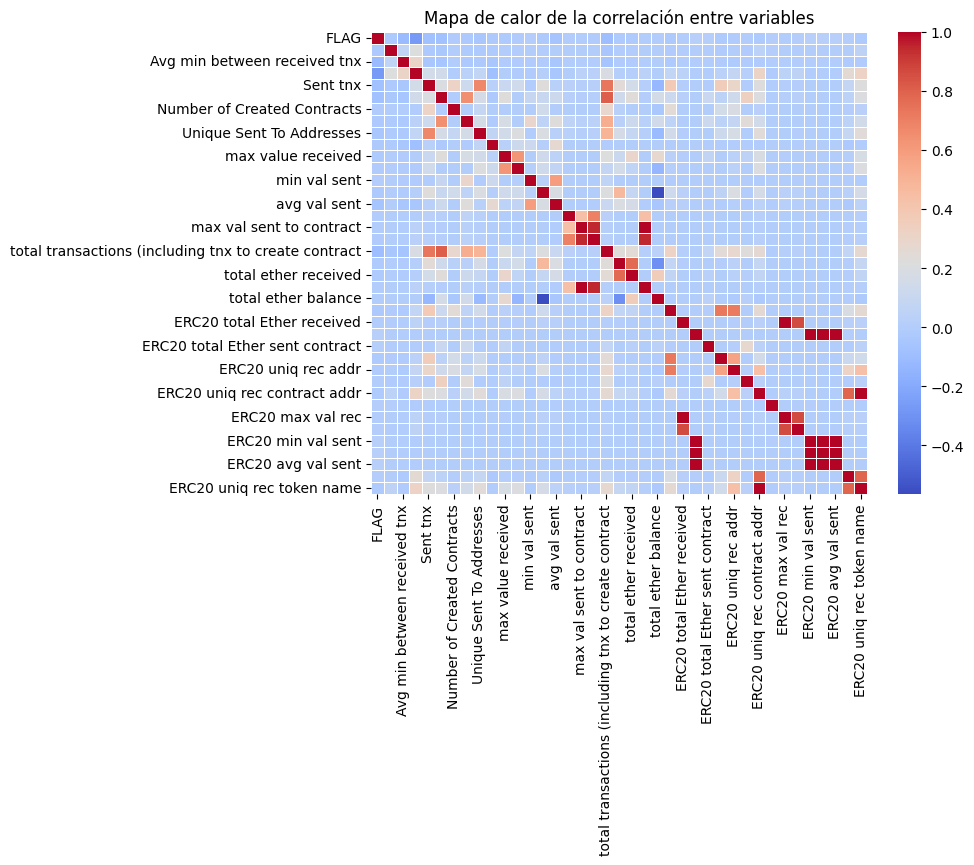

In [12]:
# Calcular la matriz de correlación
cor_matrix = numeric_df3.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la correlación entre variables")
plt.show()


Bien, podemos ver que, si bien con flag no hay correlaciones fuertes, hay otros pares de atributos que están muy correlacionados. Vamos a calcularlos.

In [13]:
# Aplanar la matriz
cor_pairs = cor_matrix.unstack()                                            # Toma la matriz de correlación (que es cuadrada y simétrica) y la convierte en una serie de pares.
                                                                            # Esto facilita trabajar con los pares de columnas y filtrar

# Eliminar correlaciones de una variable consigo misma
cor_pairs = cor_pairs[cor_pairs != 1.0]                                     # Elimina los pares en los que una variable está correlacionada consigo misma

# Eliminar duplicados (pares simétricos)
cor_pairs = cor_pairs.drop_duplicates()                                     # La matriz de correlación es simétrica, es decir que (A, B) y (B, A) tienen el mismo valor.
                                                                            # Esta línea elimina los duplicados y se queda con un solo par por combinación

# Filtrar correlaciones fuertes (positivas o negativas)
strong_corr = cor_pairs[(cor_pairs > 0.75) | (cor_pairs < -0.75)]           # Filtra todos los pares donde la correlación sea mayor a 0.75 (fuerte positiva) o menor a -0.75 (fuerte negativa

# Mostrar los pares ordenados
print("Por lo tanto los pares con mayor correlación son:")
print(strong_corr.sort_values(ascending=False))

Por lo tanto los pares con mayor correlación son:
max val sent to contract      total ether sent contracts                              1.000000
ERC20 total Ether received    ERC20 max val rec                                       0.999967
ERC20 max val sent            ERC20 avg val sent                                      0.999952
ERC20 min val sent            ERC20 avg val sent                                      0.999785
                              ERC20 max val sent                                      0.999729
ERC20 total ether sent        ERC20 max val sent                                      0.999649
ERC20 uniq rec contract addr  ERC20 uniq rec token name                               0.999642
ERC20 total ether sent        ERC20 avg val sent                                      0.999566
                              ERC20 min val sent                                      0.999311
avg value sent to contract    total ether sent contracts                              0.949608


Podemos ver que hay pares de atributos altamente correlacionados. Aquellos que están arriba del 0.99 podría elegirse uno del par y eliminarlo, ya que podría causar cierta redundancia en el modelo, es decir, tendría menos ruido y complejidad. Por otro lado se podría realizar una exploración más produnda entre esos pares y capturar relaciones que indirectamente afectan a FLAG.

Se decidió eliminar algunos, las columnas a eliminar son las siguientes:

max val sent to contract

ERC20 total Ether received

ERC20 max val sent, ERC20 min val sent, ERC20 total ether sent

ERC20 uniq rec token name

In [14]:
# Columnas que también vamos a eliminar por tener una alta correlación y que puede generar redundancia al modelo

col_redun = [
    "max val sent to contract",
    "ERC20 total Ether received",
    "ERC20 max val sent",
    "ERC20 min val sent",
    "ERC20 total ether sent",
    "ERC20 uniq rec token name"
]

numeric_df3 = numeric_df3.drop(columns=col_redun)

print('\n\nAhora son\n',len(numeric_df3.columns),'\n\ncolumnas. Todas numéricas.\n')

numeric_df3.describe()



Ahora son
 33 

columnas. Todas numéricas.



,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9841.000000,9841.000000,9841.000000,9841.00000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,110.939207,5.638038,7.598535,0.00344,4.901909,485.614688,1.252524e+08,4.346203e+06,6.318389e+06,1.384931
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,5864.793152,100.721310,78.296131,0.06287,16.504099,16156.442360,1.008377e+10,2.049013e+08,5.660130e+08,6.445170
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,5.356400e-01,4.332520e-01,0.000000e+00,0.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,0.000000,0.000000,4.000000,0.00000,4.000000,0.519421,6.000000e+02,1.480957e+02,0.000000e+00,0.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,416000.000000,6582.000000,4293.000000,3.00000,782.000000,990000.000000,1.000000e+12,1.724181e+10,5.614756e+10,213.000000


Bien, ahora veamos que tan desbalanceado está el dataset (cuantos fraudes y no fraudes hay).

In [15]:
# Conteo de cada categoría en la columna FLAG
conteo = numeric_df3['FLAG'].value_counts()

# Porcentaje de cada categoría en la columna FLAG
porcentaje = numeric_df3['FLAG'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de FLAG:")
print(conteo)
print("\nPorcentaje de FLAG:")
print(porcentaje)

Conteo de FLAG:
FLAG
0    7662
1    2179
Name: count, dtype: int64

Porcentaje de FLAG:
FLAG
0    77.857941
1    22.142059
Name: proportion, dtype: float64


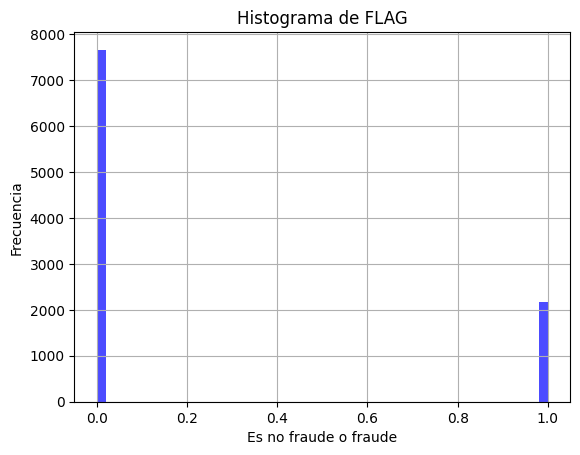

In [16]:
# Histograma
plt.hist(numeric_df3['FLAG'], bins=50, color='blue', alpha=0.7)
plt.xlabel("Es no fraude o fraude")
plt.ylabel("Frecuencia")
plt.title("Histograma de FLAG")
plt.grid(True)
plt.show()


Dado que el desbalanceo es grande (7662 no fraudes y 2179 fraudes), habrá que aplicar alguna medida de submuestreo (reducir los datos de no fraude), sobremuestreo (aumentar los datos de fraude con muestras sintéticas), un poco de ambas, o analizar otras opciones dependiendo el modelo (por ejemplo dejarlo así, ya que representa la realidad y generar datos sintéticos podría generar un modelo erróneo).

Por lo pronto el dataset ya está limpio para ser usado en el o los modelos que se prueben. Para ello, vamos a descargar y guardar este nuevo dataset en el drive:

In [ ]:
from google.colab import files

numeric_df3.to_csv("transaction_dataset_clean.csv", index=False)

files.download("transaction_dataset_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>